In [1]:
import copy
import getopt
import math
import networkx as nx
import matplotlib.pyplot as plt
import operator
import collections
import os
import random
import sys
from scipy import stats
import seaborn as sns
from matplotlib.collections import LineCollection
import numpy as np
from operator import itemgetter
import pandas as pd
import bezier
import time

from utils import (
    clean,
    clean_str,
    group_data,
    create_variable,
    group_time,
)
from network import (
    create_network,
    infection_yes_no,
    infection_cases,
    get_graph_metrics,
)

%matplotlib inline

In [2]:
G = create_network("grafo_cidades_aeroportos.gexf")
G.remove_edges_from(nx.selfloop_edges(G))
H = create_network("grafo_cidades.gexf")
H.remove_edges_from(nx.selfloop_edges(H))

Creating network.
	Calculating edge weights	Calculating edge distance	Calculating clustering coefficentsCreating network.
	Calculating edge weights	Calculating edge distance	Calculating clustering coefficents

In [3]:
def CreateBarChartForCentralityMeasures(sorted_centrality_teams, centrality_name):
    df = pd.DataFrame(sorted_centrality_teams, columns=["Team", centrality_name])
    return df

In [4]:
degree_centrality_df = CreateBarChartForCentralityMeasures(
    sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True),
    "Degree Centrality",
)
closeness_centrality_df = CreateBarChartForCentralityMeasures(
    sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True),
    "Closeness Centrality",
)
betweenness_centrality_df = CreateBarChartForCentralityMeasures(
    sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True),
    "Betweenness Centrality",
)
eigenvector_centrality_df = CreateBarChartForCentralityMeasures(
    sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True),
    "Eigenvector Centrality",
)
pagerank_df = CreateBarChartForCentralityMeasures(
    sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True), "PageRank"
)
hub, auth = nx.hits(G)
hubs_df = CreateBarChartForCentralityMeasures(
    sorted(hub.items(), key=lambda x: x[1], reverse=True), "Hubs"
)
authorities_df = CreateBarChartForCentralityMeasures(
    sorted(auth.items(), key=lambda x: x[1], reverse=True), "Authorities"
)

[04/07/23 20:53:51] WARNING  /Users/giovanna_cavali/opt/anaconda3/envs/c1w_rb/lib/python3.8/site-pa ]8;id=615656;file:///Users/giovanna_cavali/opt/anaconda3/envs/c1w_rb/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=758914;file:///Users/giovanna_cavali/opt/anaconda3/envs/c1w_rb/lib/python3.8/warnings.py#109\109]8;;\
                             ckages/networkx/algorithms/link_analysis/pagerank_alg.py:107:                         
                             DeprecationWarning: networkx.pagerank_scipy is deprecated and will be                 
                             removed in NetworkX 3.0, use networkx.pagerank instead.                               
                               return pagerank_scipy(                                                              
                                                                                                                   

In [5]:
metric_main_df = pd.DataFrame(index=list(G.nodes.keys()))
for metric in [
    degree_centrality_df,
    closeness_centrality_df,
    betweenness_centrality_df,
    eigenvector_centrality_df,
    pagerank_df,
    hubs_df,
    authorities_df,
]:
    metric = metric.set_index("Team")
    metric_main_df = metric_main_df.join(metric)

metric_main_df

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,PageRank,Hubs,Authorities
ALTA FLORESTA DOESTE (RO),0.001257,0.145386,0.000363,0.000025,0.000210,4.729106e-08,4.729106e-08
NOVA BRASILANDIA DOESTE (RO),0.001078,0.147508,0.000083,0.000074,0.000161,1.585064e-07,1.585064e-07
ROLIM DE MOURA (RO),0.001257,0.169865,0.001404,0.000581,0.000185,1.002037e-05,1.002037e-05
SANTA LUZIA DOESTE (RO),0.000898,0.145318,0.000052,0.000025,0.000137,4.080027e-08,4.080027e-08
SAO MIGUEL DO GUAPORE (RO),0.001257,0.133321,0.000040,0.000012,0.000220,3.607804e-09,3.607804e-09
...,...,...,...,...,...,...,...
SAO FRANCISCO DE GOIAS (GO),0.000718,0.124695,0.000007,0.000004,0.000110,5.107563e-10,5.107563e-10
NOVO GAMA (GO),0.000718,0.194488,0.000114,0.007758,0.000089,5.833039e-04,5.833039e-04
PORTELANDIA (GO),0.000180,0.128274,0.000000,0.000003,0.000050,1.835487e-09,1.835487e-09
PALMELO (GO),0.000359,0.147947,0.000000,0.000080,0.000053,1.464919e-07,1.464919e-07


In [36]:
degree_centrality_df = CreateBarChartForCentralityMeasures(
    sorted(nx.degree_centrality(H).items(), key=lambda x: x[1], reverse=True),
    "Degree Centrality",
)
closeness_centrality_df = CreateBarChartForCentralityMeasures(
    sorted(nx.closeness_centrality(H).items(), key=lambda x: x[1], reverse=True),
    "Closeness Centrality",
)
betweenness_centrality_df = CreateBarChartForCentralityMeasures(
    sorted(nx.betweenness_centrality(H).items(), key=lambda x: x[1], reverse=True),
    "Betweenness Centrality",
)
eigenvector_centrality_df = CreateBarChartForCentralityMeasures(
    sorted(
        nx.eigenvector_centrality(H, max_iter=600).items(),
        key=lambda x: x[1],
        reverse=True,
    ),
    "Eigenvector Centrality",
)
pagerank_df = CreateBarChartForCentralityMeasures(
    sorted(nx.pagerank(H).items(), key=lambda x: x[1], reverse=True), "PageRank"
)
hub, auth = nx.hits(H)
hubs_df = CreateBarChartForCentralityMeasures(
    sorted(hub.items(), key=lambda x: x[1], reverse=True), "Hubs"
)
authorities_df = CreateBarChartForCentralityMeasures(
    sorted(auth.items(), key=lambda x: x[1], reverse=True), "Authorities"
)

metric_main_df_H = pd.DataFrame(index=list(H.nodes.keys()))
for metric in [
    degree_centrality_df,
    closeness_centrality_df,
    betweenness_centrality_df,
    eigenvector_centrality_df,
    pagerank_df,
    hubs_df,
    authorities_df,
]:
    metric = metric.set_index("Team")
    metric_main_df_H = metric_main_df_H.join(metric)

metric_main_df_H

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│    1 degree_centrality_df = CreateBarChartForCentralityMeasures(                                 │
│ ❱  2 │   sorted(nx.degree_centrality(H).items(), key=lambda x: x[1], reverse=True),              │
│    3 │   "Degree Centrality",                                                                    │
│    4 )                                                                                           │
│    5 closeness_centrality_df = CreateBarChartForCentralityMeasures(                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

In [37]:
d = G.nodes()
for n in G.nodes():
    G.nodes[n]["name"] = n
    G.nodes[n]["degree"] = d[n]
    G.nodes[n]["degree_centrality"] = metric_main_df[metric_main_df.index == n][
        "Degree Centrality"
    ].values[0]
    G.nodes[n]["closeness_centrality"] = metric_main_df[metric_main_df.index == n][
        "Closeness Centrality"
    ].values[0]
    G.nodes[n]["betweenness_centrality"] = metric_main_df[metric_main_df.index == n][
        "Betweenness Centrality"
    ].values[0]
    G.nodes[n]["eigenvector_centrality"] = metric_main_df[metric_main_df.index == n][
        "Eigenvector Centrality"
    ].values[0]
    G.nodes[n]["pagerank"] = metric_main_df[metric_main_df.index == n][
        "PageRank"
    ].values[0]
    G.nodes[n]["hubs"] = metric_main_df[metric_main_df.index == n]["Hubs"].values[0]
    G.nodes[n]["authorities"] = metric_main_df[metric_main_df.index == n][
        "Authorities"
    ].values[0]

d = H.nodes()
for n in H.nodes():
    H.nodes[n]["name"] = n
    H.nodes[n]["degree"] = d[n]
    H.nodes[n]["degree_centrality"] = metric_main_df_H[metric_main_df_H.index == n][
        "Degree Centrality"
    ].values[0]
    H.nodes[n]["closeness_centrality"] = metric_main_df_H[metric_main_df_H.index == n][
        "Closeness Centrality"
    ].values[0]
    H.nodes[n]["betweenness_centrality"] = metric_main_df_H[
        metric_main_df_H.index == n
    ]["Betweenness Centrality"].values[0]
    H.nodes[n]["eigenvector_centrality"] = metric_main_df_H[
        metric_main_df_H.index == n
    ]["Eigenvector Centrality"].values[0]
    H.nodes[n]["pagerank"] = metric_main_df_H[metric_main_df_H.index == n][
        "PageRank"
    ].values[0]
    H.nodes[n]["hubs"] = metric_main_df_H[metric_main_df_H.index == n]["Hubs"].values[0]
    H.nodes[n]["authorities"] = metric_main_df_H[metric_main_df_H.index == n][
        "Authorities"
    ].values[0]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 d = G.nodes()                                                                               │
│    2 for n in G.nodes():                                                                         │
│    3 │   G.nodes[n]["name"] = n                                                                  │
│    4 │   G.nodes[n]["degree"] = d[n]                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'G' is not defined

In [38]:
import nx_altair as nxa
import altair as alt

fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.barplot(
    x="Degree Centrality",
    y="Team",
    data=metric_main_df.sort_values(by="Degree Centrality", ascending=False)[
        "Degree Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "Team"})[:10],
    palette="gray",
)
plt.title("Top 10 Cidades Centrais - Rede 2", fontsize=14)
plt.xlabel("Degree Centrality", fontsize=12)
plt.ylabel("City", fontsize=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 import nx_altair as nxa                                                                     │
│    2 import altair as alt                                                                        │
│    3                                                                                             │
│    4 fig, ax = plt.subplots(figsize=(6, 5))                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'nx_altair'

In [39]:
network = H
metric_data = metric_main_df_H
plt.style.use("dark_background")
top_nodes = metric_data.sort_values(by="Closeness Centrality", ascending=False)[
    "Closeness Centrality"
].reset_index()[:15]["index"]

# top_nodes = metric_data.sort_values(by='Degree Centrality', ascending=False)['Degree Centrality'].reset_index()[:15]['index']

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="white", alpha=0.5, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "degree_centrality")
size_list = [v for v in size.values()]
node_size_list = [250 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color="white",
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(
    network,
    positions,
    labels,
    font_size=16,
    font_color="darkturquoise",
    font_weight="bold",
)
# plt.title("Degree Centrality for Network G2", y=1.0, pad=-25, fontdict={'fontsize': 24, 'fontweight': 'medium'})
plt.savefig("closeness_centrality_H_black.png", transparent=True)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = H                                                                                 │
│    2 metric_data = metric_main_df_H                                                              │
│    3 plt.style.use("dark_background")                                                            │
│    4 top_nodes = metric_data.sort_values(by="Closeness Centrality", ascending=False)[            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

In [40]:
network = H
metric_data = metric_main_df_H

top_nodes = metric_data.sort_values(by="Degree Centrality", ascending=False)[
    "Degree Centrality"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "degree_centrality")
size_list = [v for v in size.values()]
node_size_list = [50 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Degree Centrality for Network G1",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("degree_centrality_H.png", transparent=False)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = H                                                                                 │
│    2 metric_data = metric_main_df_H                                                              │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Degree Centrality", ascending=False)[               │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 ax1 = sns.barplot(                                                                          │
│    3 │   x="Degree Centrality",                                                                  │
│    4 │   y="City",                                                                               │
│ ❱  5 │   data=metric_main_df_H.sort_values(by="Degree Centrality", ascending=False)[             │
│    6 │   │   "Degree Centrality"                                                                 │
│    7 │   ]                                                                                       │
│    8 │   .reset_index()                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'metric_main_df_H' is not defined

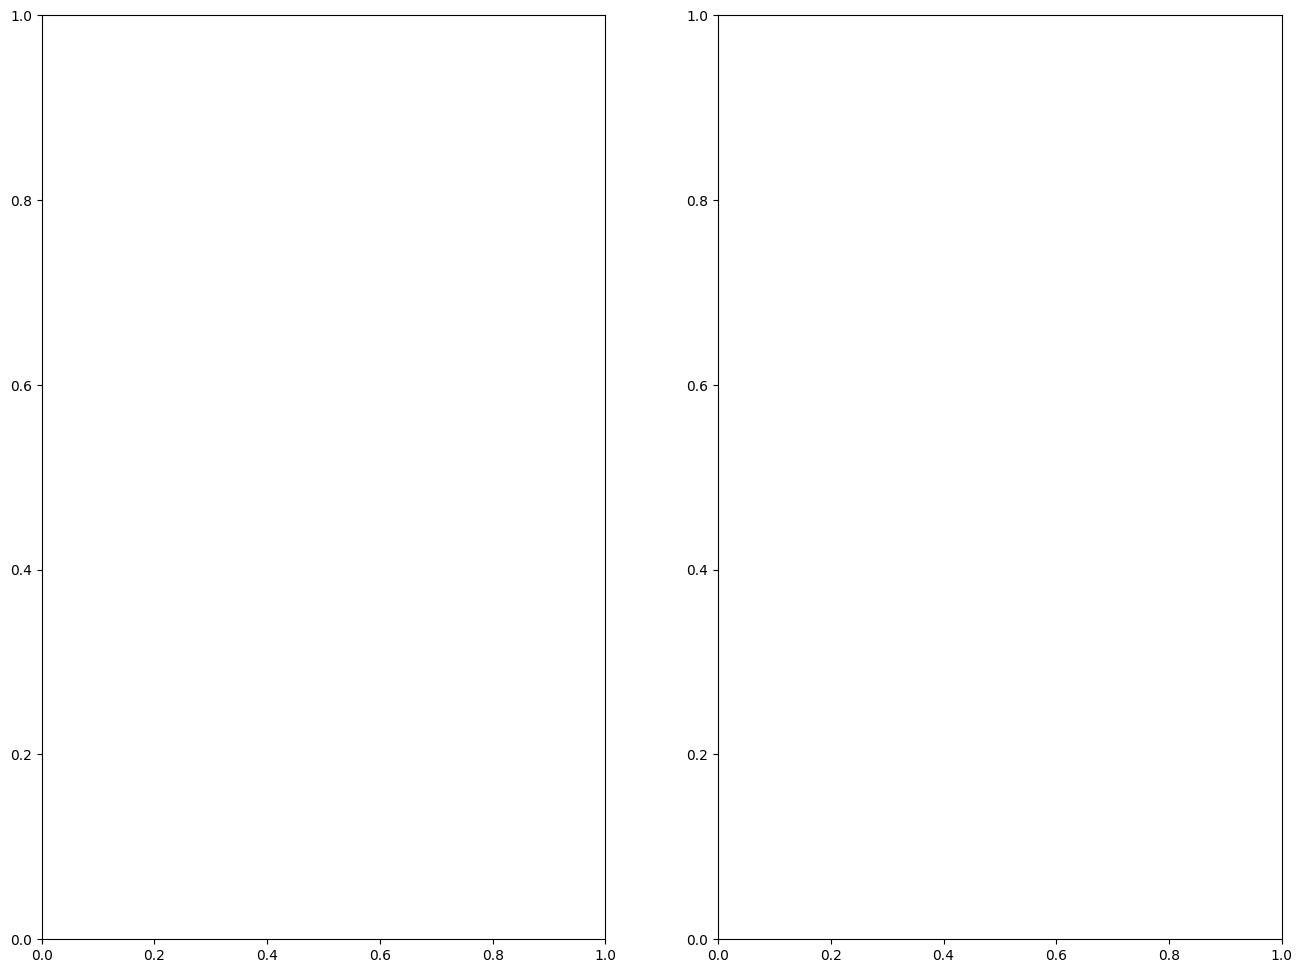

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
ax1 = sns.barplot(
    x="Degree Centrality",
    y="City",
    data=metric_main_df_H.sort_values(by="Degree Centrality", ascending=False)[
        "Degree Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "City"})[:15],
    palette="rocket_r",
    ax=ax1,
)
ax2 = sns.barplot(
    x="Degree Centrality",
    y="City",
    data=metric_main_df.sort_values(by="Degree Centrality", ascending=False)[
        "Degree Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "City"})[:15],
    palette="rocket_r",
    ax=ax2,
)
ax1.set_title("Top 15 Cities Degree Centrality for G1", fontsize=20)
ax2.set_title("Top 15 Cities Degree Centrality for G2", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=18)
ax2.tick_params(axis="both", which="major", labelsize=18)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig("degree_centrality_top_cities.png", transparent=False)
plt.show()

In [42]:
network = G
metric_data = metric_main_df

top_nodes = metric_data.sort_values(by="Closeness Centrality", ascending=False)[
    "Closeness Centrality"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "closeness_centrality")
size_list = [v for v in size.values()]
node_size_list = [20 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Closeness Centrality for Network G2",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("closeness_centrality_G.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = G                                                                                 │
│    2 metric_data = metric_main_df                                                                │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Closeness Centrality", ascending=False)[            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'G' is not defined

In [43]:
network = H
metric_data = metric_main_df_H

top_nodes = metric_data.sort_values(by="Closeness Centrality", ascending=False)[
    "Closeness Centrality"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "closeness_centrality")
size_list = [v for v in size.values()]
node_size_list = [20 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Closeness Centrality for Network G1",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("closeness_centrality_H.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = H                                                                                 │
│    2 metric_data = metric_main_df_H                                                              │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Closeness Centrality", ascending=False)[            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 ax1 = sns.barplot(                                                                          │
│    3 │   x="Closeness Centrality",                                                               │
│    4 │   y="Team",                                                                               │
│ ❱  5 │   data=metric_main_df_H.sort_values(by="Closeness Centrality", ascending=False)[          │
│    6 │   │   "Closeness Centrality"                                                              │
│    7 │   ]                                                                                       │
│    8 │   .reset_index()                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'metric_main_df_H' is not defined

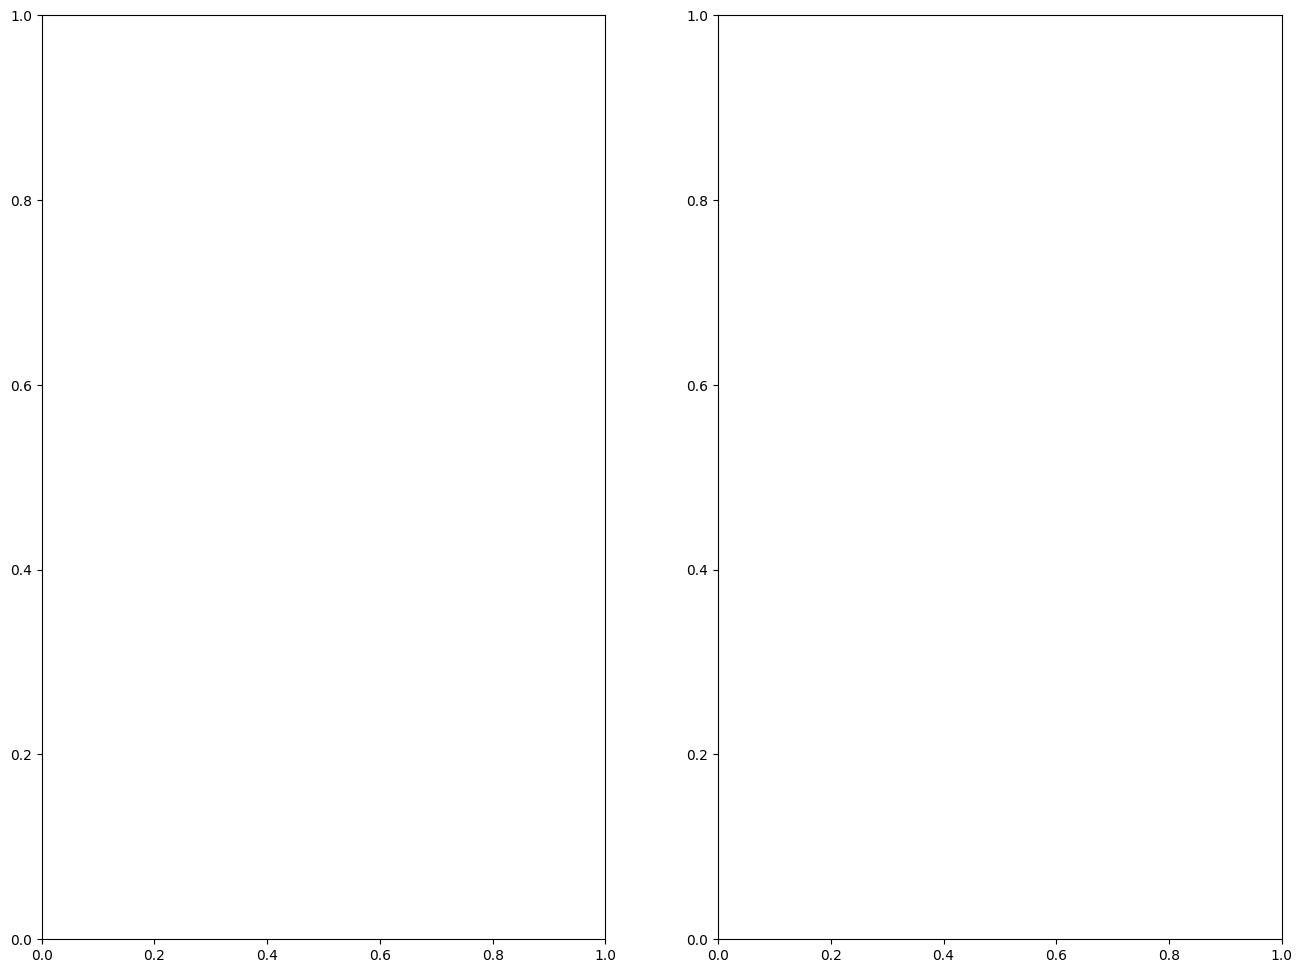

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
ax1 = sns.barplot(
    x="Closeness Centrality",
    y="Team",
    data=metric_main_df_H.sort_values(by="Closeness Centrality", ascending=False)[
        "Closeness Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax1,
)
ax2 = sns.barplot(
    x="Closeness Centrality",
    y="Team",
    data=metric_main_df.sort_values(by="Closeness Centrality", ascending=False)[
        "Closeness Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax2,
)
ax1.set_title("Top 15 Cities Closeness Centrality for G1", fontsize=20)
ax2.set_title("Top 15 Cities Closeness Centrality for G2", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=18)
ax2.tick_params(axis="both", which="major", labelsize=18)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig("closeness_centrality_top_cities.png", transparent=False)
plt.show()

In [45]:
network = G
metric_data = metric_main_df

top_nodes = metric_data.sort_values(by="Betweenness Centrality", ascending=False)[
    "Betweenness Centrality"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "betweenness_centrality")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Betweenness Centrality for Network G2",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("betweenness_centrality_G.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = G                                                                                 │
│    2 metric_data = metric_main_df                                                                │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Betweenness Centrality", ascending=False)[          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'G' is not defined

In [46]:
network = H
metric_data = metric_main_df_H

top_nodes = metric_data.sort_values(by="Betweenness Centrality", ascending=False)[
    "Betweenness Centrality"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "betweenness_centrality")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Betweenness Centrality for Network G1",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("betweenness_centrality_H.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = H                                                                                 │
│    2 metric_data = metric_main_df_H                                                              │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Betweenness Centrality", ascending=False)[          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 ax1 = sns.barplot(                                                                          │
│    3 │   x="Betweenness Centrality",                                                             │
│    4 │   y="City",                                                                               │
│ ❱  5 │   data=metric_main_df_H.sort_values(by="Betweenness Centrality", ascending=False)[        │
│    6 │   │   "Betweenness Centrality"                                                            │
│    7 │   ]                                                                                       │
│    8 │   .reset_index()                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'metric_main_df_H' is not defined

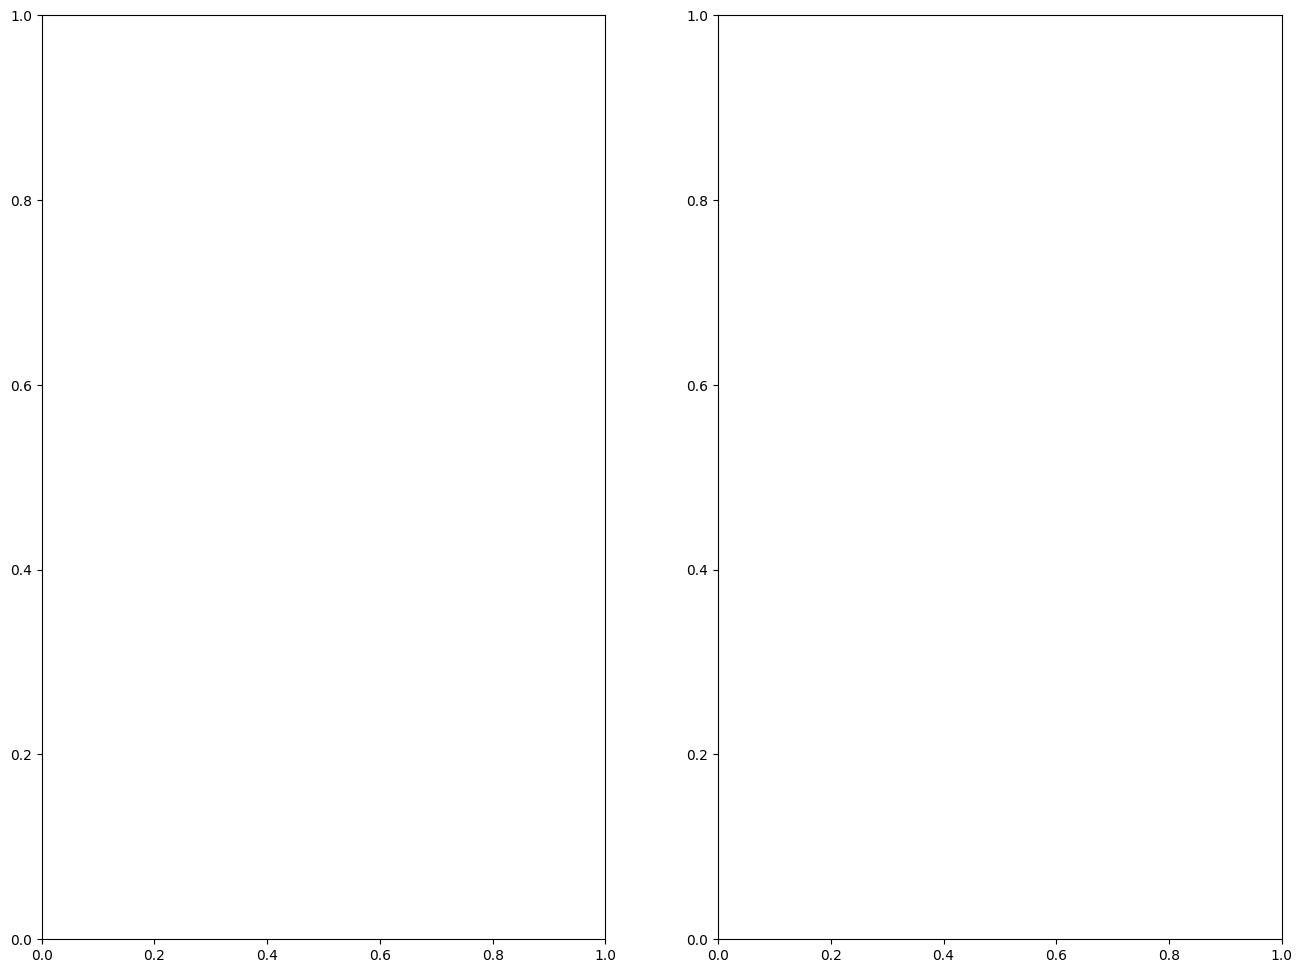

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
ax1 = sns.barplot(
    x="Betweenness Centrality",
    y="City",
    data=metric_main_df_H.sort_values(by="Betweenness Centrality", ascending=False)[
        "Betweenness Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "City"})[:15],
    palette="rocket_r",
    ax=ax1,
)
ax2 = sns.barplot(
    x="Betweenness Centrality",
    y="City",
    data=metric_main_df.sort_values(by="Betweenness Centrality", ascending=False)[
        "Betweenness Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "City"})[:15],
    palette="rocket_r",
    ax=ax2,
)
ax1.set_title("Top 15 Cities Betweenness Centrality for G1", fontsize=20)
ax2.set_title("Top 15 Cities Betweenness Centrality for G2", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=18)
ax2.tick_params(axis="both", which="major", labelsize=18)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig("betweenness_centrality_top_cities.png", transparent=False)
plt.show()

In [48]:
network = G
metric_data = metric_main_df

top_nodes = metric_data.sort_values(by="Eigenvector Centrality", ascending=False)[
    "Eigenvector Centrality"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "eigenvector_centrality")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Eigenvector Centrality for Network G2",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("eigenvector_centrality_G.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = G                                                                                 │
│    2 metric_data = metric_main_df                                                                │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Eigenvector Centrality", ascending=False)[          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'G' is not defined

In [49]:
network = H
metric_data = metric_main_df_H

top_nodes = metric_data.sort_values(by="Eigenvector Centrality", ascending=False)[
    "Eigenvector Centrality"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "eigenvector_centrality")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Eigenvector Centrality for Network G1",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("eigenvector_centrality_H.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = H                                                                                 │
│    2 metric_data = metric_main_df_H                                                              │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Eigenvector Centrality", ascending=False)[          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 ax1 = sns.barplot(                                                                          │
│    3 │   x="Eigenvector Centrality",                                                             │
│    4 │   y="Team",                                                                               │
│ ❱  5 │   data=metric_main_df_H.sort_values(by="Eigenvector Centrality", ascending=False)[        │
│    6 │   │   "Eigenvector Centrality"                                                            │
│    7 │   ]                                                                                       │
│    8 │   .reset_index()                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'metric_main_df_H' is not defined

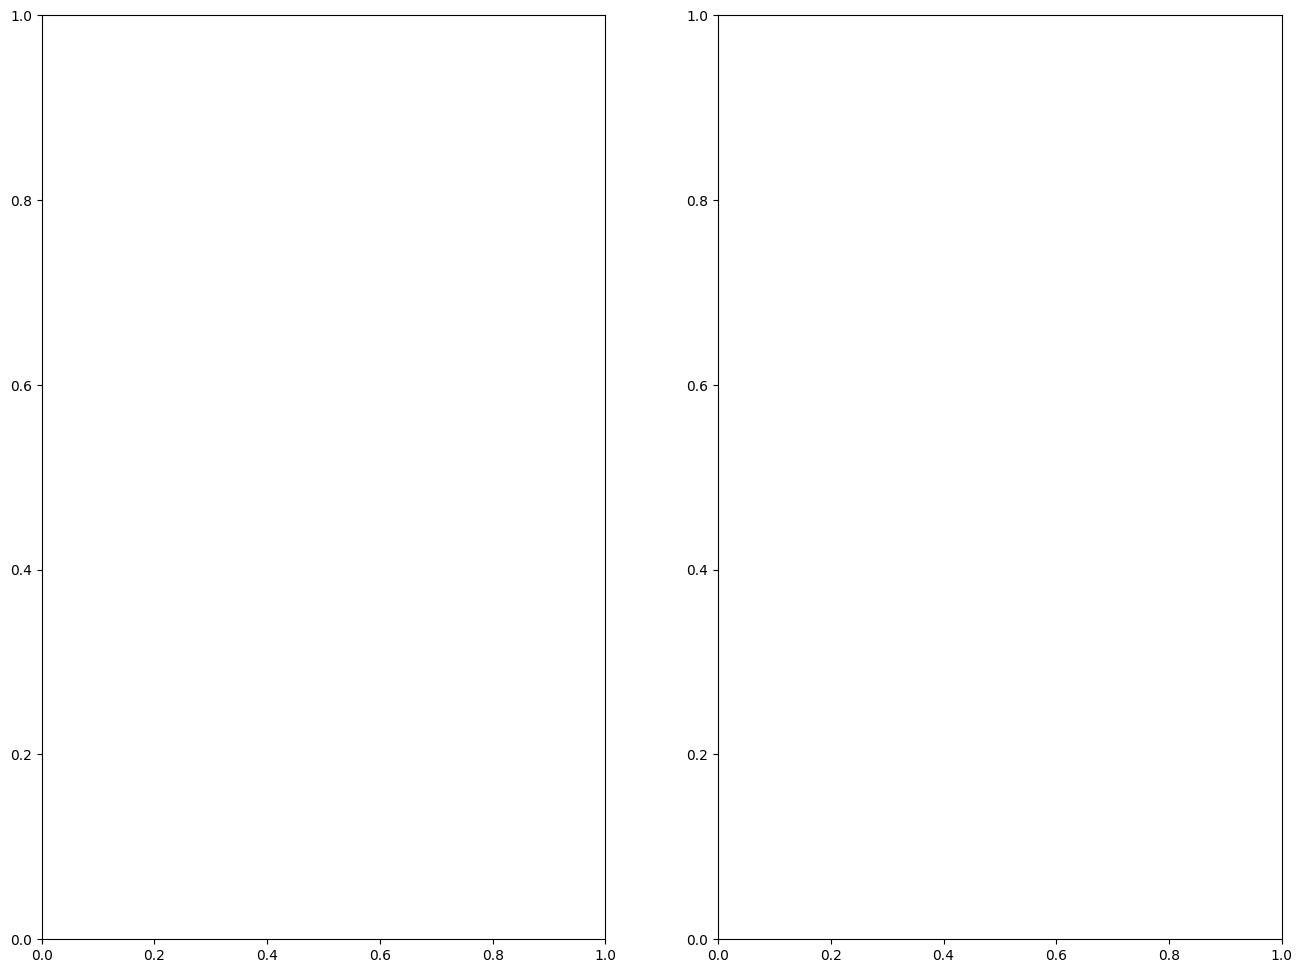

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
ax1 = sns.barplot(
    x="Eigenvector Centrality",
    y="Team",
    data=metric_main_df_H.sort_values(by="Eigenvector Centrality", ascending=False)[
        "Eigenvector Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax1,
)
ax2 = sns.barplot(
    x="Eigenvector Centrality",
    y="Team",
    data=metric_main_df.sort_values(by="Eigenvector Centrality", ascending=False)[
        "Eigenvector Centrality"
    ]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax2,
)
ax1.set_title("Top 15 Cities Eigenvector Centrality for G1", fontsize=20)
ax2.set_title("Top 15 Cities Eigenvector Centrality for G2", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=18)
ax2.tick_params(axis="both", which="major", labelsize=18)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig("eigenvector_centrality_top_cities.png", transparent=False)
plt.show()

In [51]:
network = G
metric_data = metric_main_df

top_nodes = metric_data.sort_values(by="PageRank", ascending=False)[
    "PageRank"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "pagerank")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "PageRank for Network G2",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("pagerank_G.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = G                                                                                 │
│    2 metric_data = metric_main_df                                                                │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="PageRank", ascending=False)[                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'G' is not defined

In [52]:
network = H
metric_data = metric_main_df_H

top_nodes = metric_data.sort_values(by="PageRank", ascending=False)[
    "PageRank"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "pagerank")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "PageRank for Network G1",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("pagerank_H.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = H                                                                                 │
│    2 metric_data = metric_main_df_H                                                              │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="PageRank", ascending=False)[                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 ax1 = sns.barplot(                                                                          │
│    3 │   x="PageRank",                                                                           │
│    4 │   y="Team",                                                                               │
│ ❱  5 │   data=metric_main_df.sort_values(by="PageRank", ascending=False)["PageRank"]             │
│    6 │   .reset_index()                                                                          │
│    7 │   .rename(columns={"index": "Team"})[:15],                                                │
│    8 │   palette="rocket_r",                                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'metric_main_df' is not defined

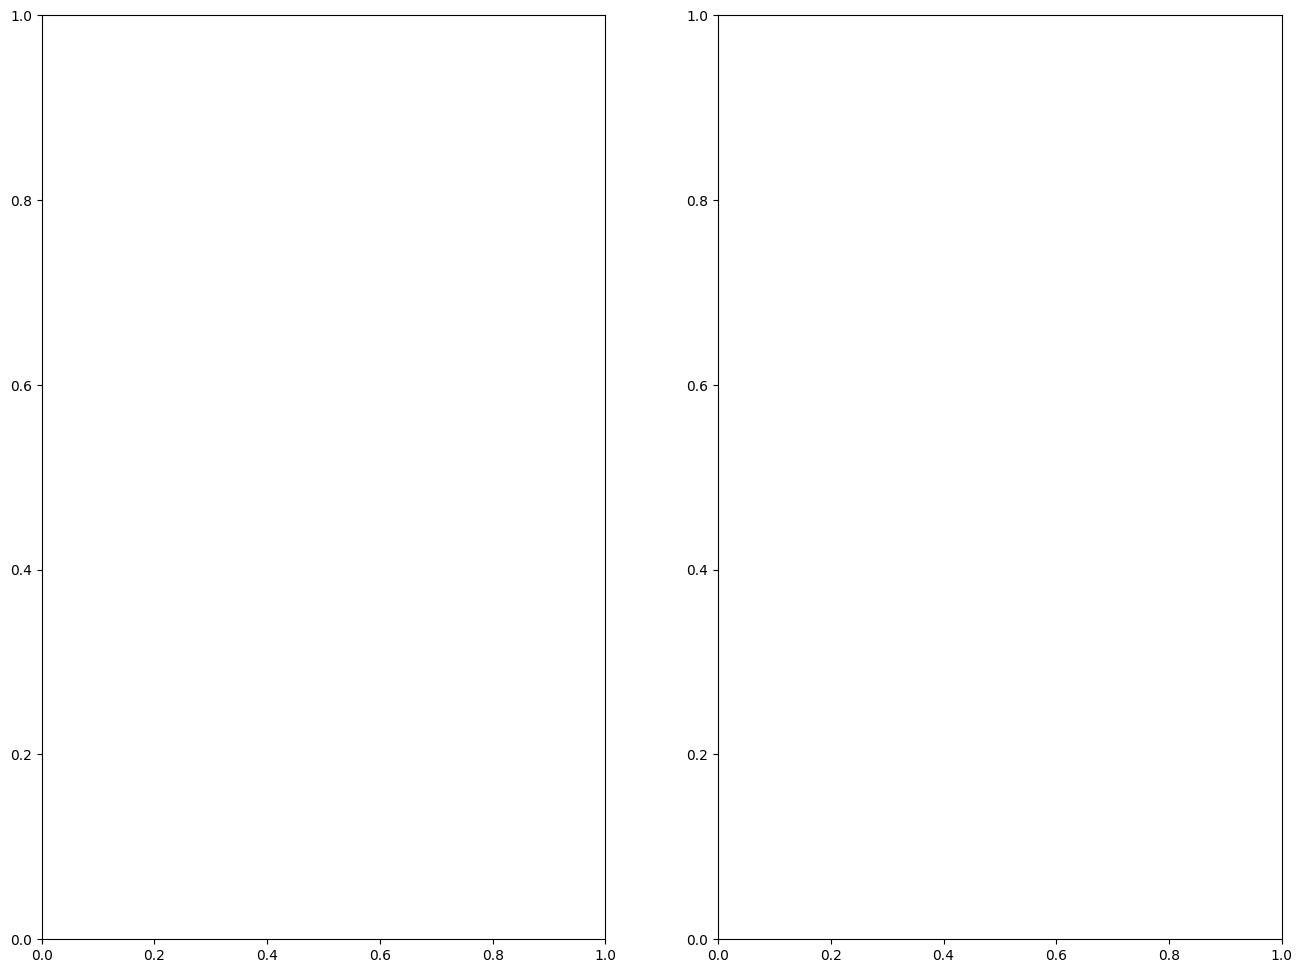

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
ax1 = sns.barplot(
    x="PageRank",
    y="Team",
    data=metric_main_df.sort_values(by="PageRank", ascending=False)["PageRank"]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax1,
)
ax2 = sns.barplot(
    x="PageRank",
    y="Team",
    data=metric_main_df.sort_values(by="PageRank", ascending=False)["PageRank"]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax2,
)
ax1.set_title("Top 15 Cities PageRank for G1", fontsize=20)
ax2.set_title("Top 15 Cities PageRank for G2", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=18)
ax2.tick_params(axis="both", which="major", labelsize=18)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig("pagerank_top_cities.png", transparent=False)
plt.show()

In [54]:
network = G
metric_data = metric_main_df

top_nodes = metric_data.sort_values(by="Hubs", ascending=False)["Hubs"].reset_index()[
    :15
]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "hubs")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Hubs for Network G2",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("hubs_G.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = G                                                                                 │
│    2 metric_data = metric_main_df                                                                │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Hubs", ascending=False)["Hubs"].reset_index()[      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'G' is not defined

In [55]:
network = H
metric_data = metric_main_df_H

top_nodes = metric_data.sort_values(by="Hubs", ascending=False)["Hubs"].reset_index()[
    :15
]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "hubs")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = 0.5  # [float(i)/max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Hubs for Network G1",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("hubs_H.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = H                                                                                 │
│    2 metric_data = metric_main_df_H                                                              │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Hubs", ascending=False)["Hubs"].reset_index()[      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 ax1 = sns.barplot(                                                                          │
│    3 │   x="Hubs",                                                                               │
│    4 │   y="Team",                                                                               │
│ ❱  5 │   data=metric_main_df_H.sort_values(by="Hubs", ascending=False)["Hubs"]                   │
│    6 │   .reset_index()                                                                          │
│    7 │   .rename(columns={"index": "Team"})[:15],                                                │
│    8 │   palette="rocket_r",                                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'metric_main_df_H' is not defined

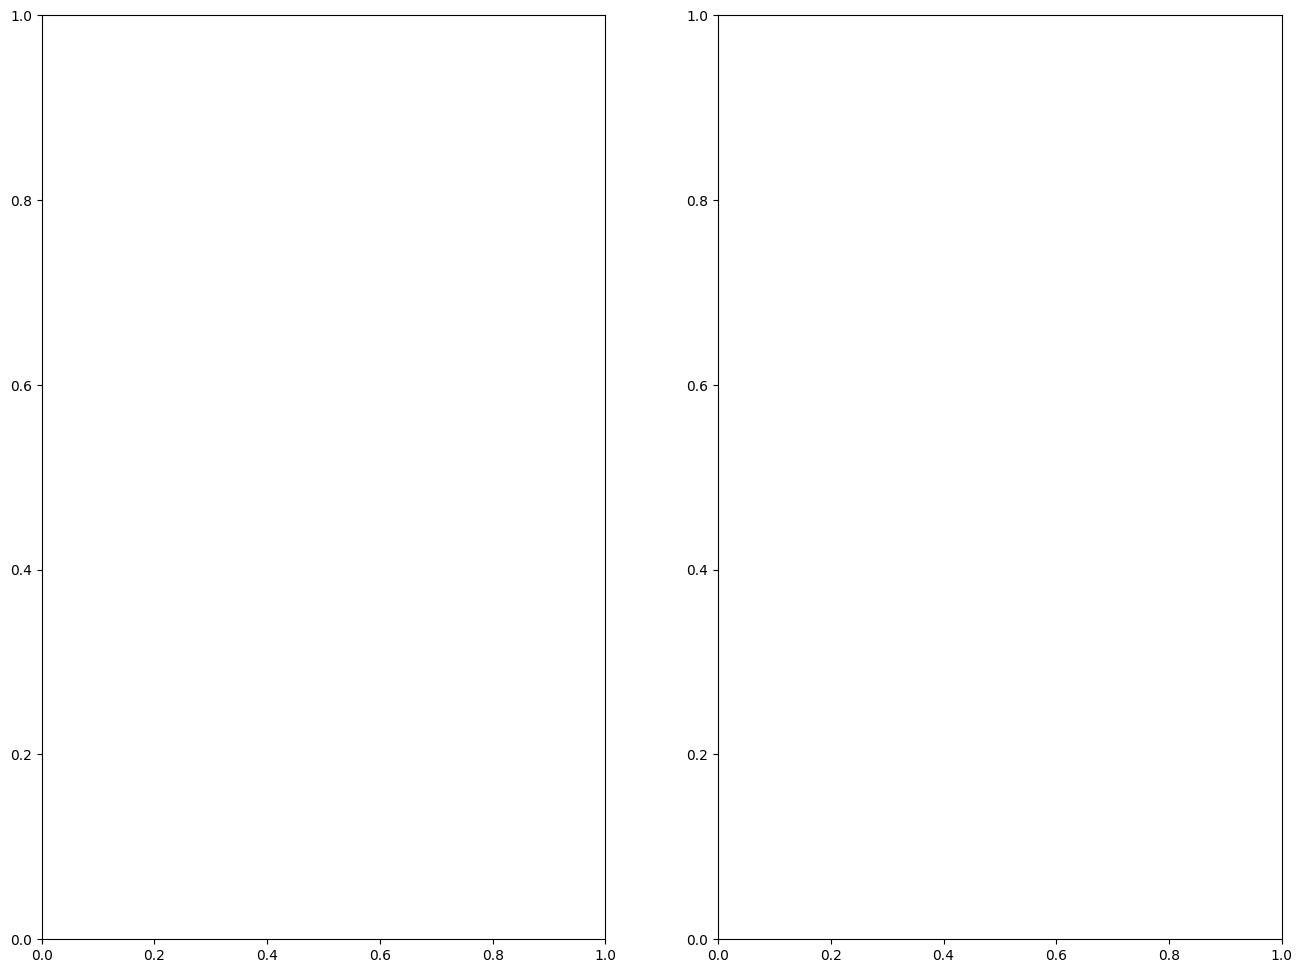

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
ax1 = sns.barplot(
    x="Hubs",
    y="Team",
    data=metric_main_df_H.sort_values(by="Hubs", ascending=False)["Hubs"]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax1,
)
ax2 = sns.barplot(
    x="Hubs",
    y="Team",
    data=metric_main_df.sort_values(by="Hubs", ascending=False)["Hubs"]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax2,
)
ax1.set_title("Top 15 Cities Hubs for G1", fontsize=20)
ax2.set_title("Top 15 Cities Hubs for G2", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=18)
ax2.tick_params(axis="both", which="major", labelsize=18)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig("hubs_top_cities.png", transparent=False)
plt.show()

In [57]:
network = G
metric_data = metric_main_df

top_nodes = metric_data.sort_values(by="Authorities", ascending=False)[
    "Authorities"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "authorities")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = [float(i) / max(size_list) for i in size_list]

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Authorities for Network G2",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("authorities_G.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = G                                                                                 │
│    2 metric_data = metric_main_df                                                                │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Authorities", ascending=False)[                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'G' is not defined

In [58]:
network = H
metric_data = metric_main_df_H

top_nodes = metric_data.sort_values(by="Authorities", ascending=False)[
    "Authorities"
].reset_index()[:15]["index"]

labels = {}
for node in top_nodes:
    labels[node] = node

linestyle_list = [
    "dotted" if x[2]["aereo"] == "sim" else "solid"
    for x in list(network.edges(data=True))
]
capital = nx.get_node_attributes(network, "capital")
region = nx.get_node_attributes(network, "region")
positions = nx.get_node_attributes(network, "pos")
# Produce the curves
curves = curved_edges(network, positions)
lc = LineCollection(curves, color="black", alpha=0.1, linestyle=linestyle_list)

size = nx.get_node_attributes(network, "authorities")
size_list = [v for v in size.values()]
node_size_list = [200 * float(i) / max(size_list) for i in size_list]
node_alpha_list = 0.5

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(
    network,
    positions,
    node_size=node_size_list,
    alpha=node_alpha_list,
    node_color=(0.888292, 0.40830288, 0.36223756),
)
plt.gca().add_collection(lc)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
nx.draw_networkx_labels(network, positions, labels, font_size=16, font_color="black")
plt.title(
    "Authorities for Network G1",
    y=1.0,
    pad=-25,
    fontdict={"fontsize": 24, "fontweight": "medium"},
)
plt.savefig("authorities_H.png", transparent=False)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 network = H                                                                                 │
│    2 metric_data = metric_main_df_H                                                              │
│    3                                                                                             │
│    4 top_nodes = metric_data.sort_values(by="Authorities", ascending=False)[                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'H' is not defined

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 ax1 = sns.barplot(                                                                          │
│    3 │   x="Authorities",                                                                        │
│    4 │   y="Team",                                                                               │
│ ❱  5 │   data=metric_main_df_H.sort_values(by="Authorities", ascending=False)["Authorities"]     │
│    6 │   .reset_index()                                                                          │
│    7 │   .rename(columns={"index": "Team"})[:15],                                                │
│    8 │   palette="rocket_r",                                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'metric_main_df_H' is not defined

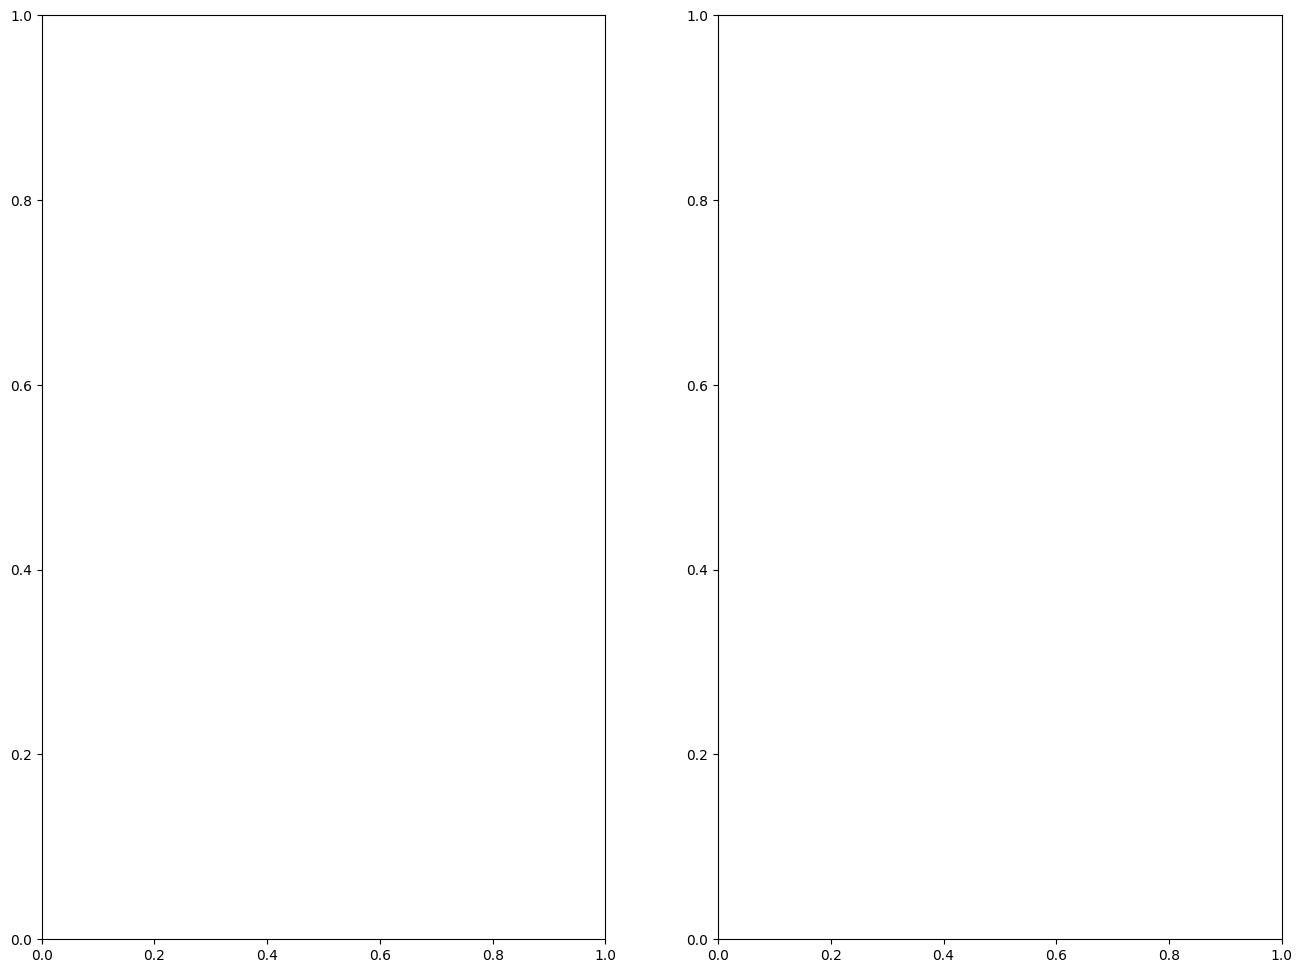

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))
ax1 = sns.barplot(
    x="Authorities",
    y="Team",
    data=metric_main_df_H.sort_values(by="Authorities", ascending=False)["Authorities"]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax1,
)
ax2 = sns.barplot(
    x="Authorities",
    y="Team",
    data=metric_main_df.sort_values(by="Authorities", ascending=False)["Authorities"]
    .reset_index()
    .rename(columns={"index": "Team"})[:15],
    palette="rocket_r",
    ax=ax2,
)
ax1.set_title("Top 15 Cities Authorities for G1", fontsize=20)
ax2.set_title("Top 15 Cities Authorities for G2", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=18)
ax2.tick_params(axis="both", which="major", labelsize=18)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig("authorities_top_cities.png", transparent=False)
plt.show()

In [60]:
(avg_path_G, d_G, den_G, clus_G) = summary(G)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 (avg_path_G, d_G, den_G, clus_G) = summary(G)                                                │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'summary' is not defined

In [61]:
(avg_path_H, d_H, den_H, clus_H) = summary(H)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 (avg_path_H, d_H, den_H, clus_H) = summary(H)                                                │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'summary' is not defined